In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/countries-of-the-world-2023/world-data-2023.csv")

In [4]:
df.head(10)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,...,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
7,Armenia,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",...,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189
8,Australia,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",...,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,Austria,109,AT,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",...,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072


In [5]:
# lets check data types
df.dtypes

Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

In [20]:
df.describe()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,GDP per capita
count,195.000000,188.000000,1.940000e+02,1.710000e+02,189.000000,194.000000,1.880000e+02,178.000000,179.000000,188.000000,...,188.000000,1.940000e+02,176.000000,169.000000,183.000000,176.000000,1.900000e+02,194.000000,194.000000,193.000000
mean,356.764103,39.117553,6.896244e+05,1.592749e+05,20.214974,360.546392,1.777992e+05,190.460955,6.722346,2.698138,...,1.839840,3.938116e+07,62.738068,16.573964,40.822404,6.886364,2.230454e+07,19.092351,20.232434,15690.877246
std,1982.888967,21.783052,1.921609e+06,3.806288e+05,9.945774,323.236419,8.387903e+05,397.947380,24.450414,1.282267,...,1.684261,1.450924e+08,10.502907,6.961632,20.557662,5.079216,7.543050e+07,23.961779,66.716110,25268.434004
min,2.000000,0.600000,0.000000e+00,0.000000e+00,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,...,0.010000,8.360000e+02,38.000000,0.000000,8.000000,0.090000,5.464000e+03,-40.900557,-175.198242,261.247473
25%,35.500000,21.700000,2.382825e+04,1.100000e+04,11.300000,82.500000,2.304250e+03,113.885000,1.000000,1.705000,...,0.332500,1.962678e+06,56.150000,11.700000,30.600000,3.395000,1.152961e+06,4.544175,-7.941496,1912.903745
50%,89.000000,39.600000,1.195110e+05,3.100000e+04,17.950000,255.500000,1.230300e+04,125.340000,2.300000,2.245000,...,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06,17.273849,20.972652,5955.109010
75%,216.500000,55.375000,5.242560e+05,1.420000e+05,28.750000,506.750000,6.388425e+04,157.265000,4.250000,3.597500,...,2.935000,2.858549e+07,69.500000,21.100000,48.000000,9.490000,1.490324e+07,40.124603,48.281523,17401.721516
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,...,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08,64.963051,178.065032,184396.986783


In [11]:
# found a better way to change str data types to float
# data cleaning for correlation heatmap

column_to_float=['Density\n(P/Km2)', 'Agricultural Land( %)','Land Area(Km2)',
                 'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                 'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price','GDP',
                 'Gross primary education enrollment (%)', "Armed Forces size",
                 'Gross tertiary education enrollment (%)', 'Infant mortality',
                 'Life expectancy', 'Maternal mortality ratio','Minimum wage', 
                 'Out of pocket health expenditure','Physicians per thousand', 
                 'Population','Population: Labor force participation (%)', 
                 'Tax revenue (%)','Total tax rate', 'Unemployment rate', 'Urban_population']

for column in column_to_float:
    df[column]=df[column].astype(str)
    df[column]=df[column].str.replace(",","")
    df[column]=df[column].str.replace("$","")
    df[column]=df[column].str.replace("%","").astype(float)

/tmp/ipykernel_32/1806924739.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column]=df[column].str.replace("$","")


In [7]:
# i need a new column 'GDP per capita' for detailed plots

df['GDP per capita']=df['GDP']/df['Population']

In [8]:
correlation_matrix_values = ['Birth Rate', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'GDP per capita',
                             'Fertility Rate', 'GDP', 'Infant mortality', 'Life expectancy',
                             'Maternal mortality ratio','Minimum wage', 'Physicians per thousand',
                             'Unemployment rate', 'Urban_population']

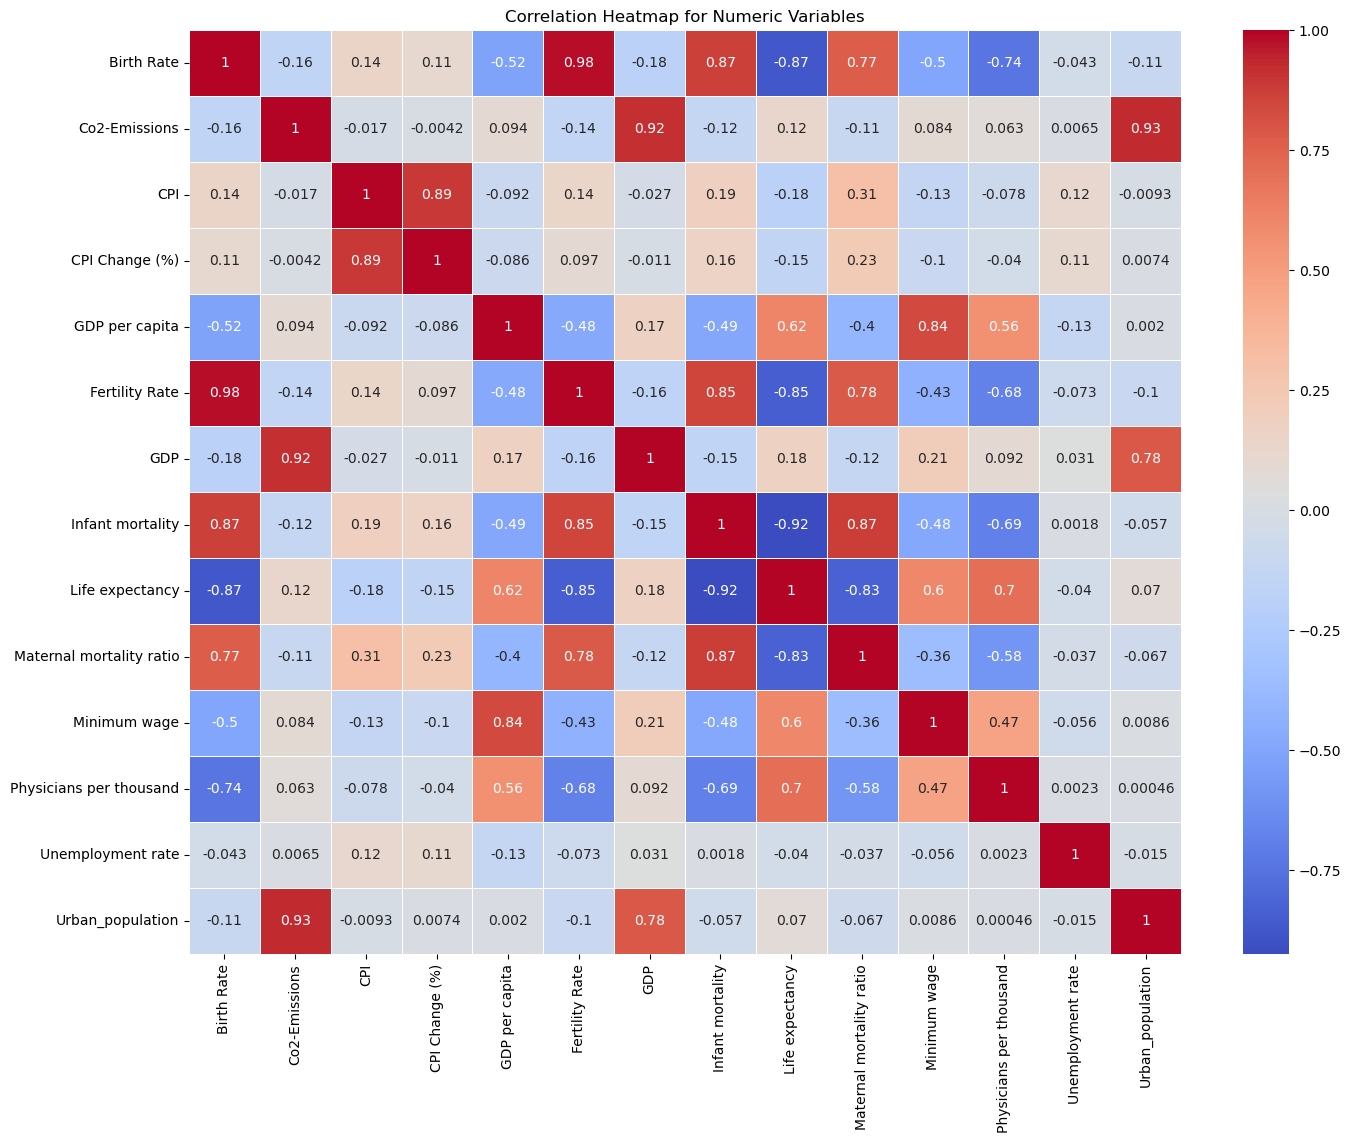

In [14]:
# correlation matrix
correlation_matrix = df[correlation_matrix_values].corr()

# heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()

In [18]:
# as we can see there are a several strong correlations, lets take a look at them

country_by_gdp = df.sort_values(by='GDP',ascending=False).head(20)

fig=make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(
            name="GDP",
            x=country_by_gdp["Country"], 
            y=country_by_gdp["GDP"],
            mode='lines',
            showlegend=True,
            marker=dict(
                opacity=0.5,
                showscale=False,
            )),row=1,col=1,
        )

fig.add_trace(go.Scatter(
            name="Urban population",
            x=country_by_gdp["Country"], 
            y=country_by_gdp["Urban_population"],
            mode='lines',
            showlegend=True,
            marker=dict(
                opacity=0.5,
                showscale=False,
            )),row=2,col=1,
        )

# hide x-axis labels of the first subplot
fig.update_xaxes(showticklabels=False, row=1, col=1)

fig.show()

In [19]:
fig=make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(
            name="GDP per capita",
            x=country_by_gdp["Country"], 
            y=country_by_gdp["GDP per capita"],
            mode='lines',
            showlegend=True,
            marker=dict(
                opacity=0.5,
                showscale=False,
            )),row=1,col=1,
        )

fig.add_trace(go.Scatter(
            name="CO2-Emissions",
            x=country_by_gdp["Country"], 
            y=country_by_gdp["Co2-Emissions"],
            mode='lines',
            showlegend=True,
            marker=dict(
                opacity=0.5,
                showscale=False,
            )),row=2,col=1,
        )

# Hide x-axis labels of the first subplot
fig.update_xaxes(showticklabels=False, row=1, col=1)

fig.show()

In [22]:
fig=make_subplots(rows=5, cols=1)
fig.add_trace(go.Scatter(
            name="Infant mortality",
            x=country_by_gdp["Country"], 
            y=country_by_gdp["Infant mortality"],
            mode='lines',
            showlegend=True,
            marker=dict(
                opacity=0.5,
                showscale=False,
            )),row=1,col=1,
        )

fig.add_trace(go.Scatter(
            name="Maternal mortality ratio",
            x=country_by_gdp["Country"], 
            y=country_by_gdp["Maternal mortality ratio"],
            mode='lines',
            showlegend=True,
            marker=dict(
                opacity=0.5,
                showscale=False,
            )),row=2,col=1,
        )

fig.add_trace(go.Scatter(
            name="Fertility Rate",
            x=country_by_gdp["Country"], 
            y=country_by_gdp["Fertility Rate"],
            mode='lines',
            showlegend=True,
            marker=dict(
                opacity=0.5,
                showscale=False,
            )),row=3,col=1,
        )

fig.add_trace(go.Scatter(
            name="Life expectancy",
            x=country_by_gdp["Country"], 
            y=country_by_gdp["Life expectancy"],
            mode='lines',
            showlegend=True,
            marker=dict(
                opacity=0.5,
                showscale=False,
            )),row=4,col=1,
        )

fig.add_trace(go.Scatter(
            name="GDP per capita",
            x=country_by_gdp["Country"], 
            y=country_by_gdp["GDP per capita"],
            mode='lines',
            showlegend=True,
            marker=dict(
                opacity=0.5,
                showscale=False,
            )),row=5,col=1,
        )

# hiding x-axis labels for first 4 rows
fig.update_xaxes(showticklabels=False, row=1, col=1)
fig.update_xaxes(showticklabels=False, row=2, col=1)
fig.update_xaxes(showticklabels=False, row=3, col=1)
fig.update_xaxes(showticklabels=False, row=4, col=1)

fig.show()

In [23]:
fig=make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(
            name="Life expectancy",
            x=country_by_gdp["Country"], 
            y=country_by_gdp["Life expectancy"],
            mode='lines',
            showlegend=True,
            marker=dict(
                opacity=0.5,
                showscale=False,
            )),row=1,col=1,
        )

fig.add_trace(go.Scatter(
            name="Physicians per thousand",
            x=country_by_gdp["Country"], 
            y=country_by_gdp["Physicians per thousand"],
            mode='lines',
            showlegend=True,
            marker=dict(
                opacity=0.5,
                showscale=False,
            )),row=2,col=1,
        )

# hide x-axis labels of the first subplot
fig.update_xaxes(showticklabels=False, row=1, col=1)

fig.show()